
## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 2: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Tuesday, 24th September submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Task 1: Logistic Regression on PCA components
In the following code, you have to add a few lines to apply logistic regression to the PCA components. More specifically:
 0. Load the Iris Dataset
 1. Implement Standard Scalar based feature extraction
 2. Implement PCA and use all components and compute the explained variance of each PCA component
 3. Implement PCA and use two components that explain maximum variance. Implement logistic regression model to train and test and give a visual display of the performance by showing a plot of the decision regions along with the test data. Print the test accuracy.

## Import Statements

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Function to plot decision regions

In [2]:
# Lets plot our decision regions to visualize how well the classification worked
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## Task 1 Part 0

In [3]:
## Load Iris Dataset and use two features: Sepal Length and Petal Length

iris = pd.read_csv("iris.csv")
X = iris.iloc[:, [1,3]].values
X
Y = iris.iloc[:, 5].values
Y
class_mapping = {label:idx+1 for idx,label in 
                 enumerate(np.unique(Y))}
iris['Species'] = iris['Species'].map(class_mapping)
Y = iris.iloc[:,5].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [4]:
#Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

## Task 1 Part 1

In [5]:
#Running Logistic Regression with unstandardized components

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=1, random_state=0) 
lr.fit(X_train, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
#Checking Accuracy

Y_pred = lr.predict(X_test)
# Lets see how good we did
print('Misclassified samples: %d' %(Y_test != Y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test,Y_pred))

Misclassified samples: 8
Accuracy: 0.82


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


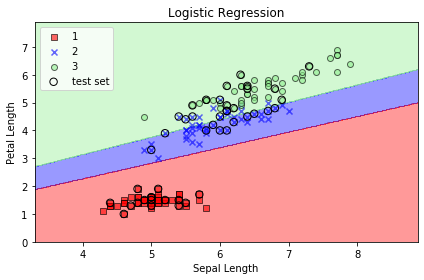

In [7]:
X_combined_std = np.vstack((X_train, X_test))
Y_combined = np.hstack((Y_train, Y_test))
Y_combined
plot_decision_regions(X_combined_std, Y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('Logistic Regression')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('logistic_regression.png', dpi=300)
plt.show()

## Task 1 Part 2

In [8]:
# Running Logistic Regression with Standardied Components

## Use StandardScalar to scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=1, random_state=0) 
lr.fit(X_train_std, Y_train)

Y_pred = lr.predict(X_test_std)
# Lets see how good we did
print('Misclassified samples: %d' %(Y_test != Y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test,Y_pred))

Misclassified samples: 9
Accuracy: 0.80


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


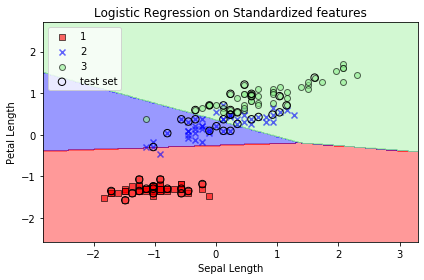

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))
Y_combined
plot_decision_regions(X_combined_std, Y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('Logistic Regression on Standardized features')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('logistic_regression.png', dpi=300)
plt.show()

## Task 1 Part 3

In [10]:
# Plotting explained variance ratio for PCA with 4 Components

## Load Iris Dataset and use all four features

iris = pd.read_csv("iris.csv")
X = iris.iloc[:, [1,2,3,4]].values
X
Y = iris.iloc[:, 5].values
Y
class_mapping = {label:idx+1 for idx,label in 
                 enumerate(np.unique(Y))}
iris['Species'] = iris['Species'].map(class_mapping)
Y = iris.iloc[:,5].values

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.71803699, 0.24442718, 0.03337158, 0.00416425])

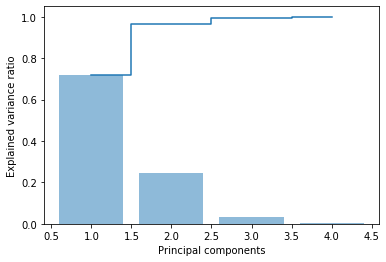

In [12]:

plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 5), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## Task 1 Part 4

In [13]:
# Running Logistic Regression on 2 Principal Components

In [14]:
pca = PCA(n_components=2)
X_train_pca_scikit = pca.fit_transform(X_train_std)
X_test_pca_scikit = pca.transform(X_test_std)

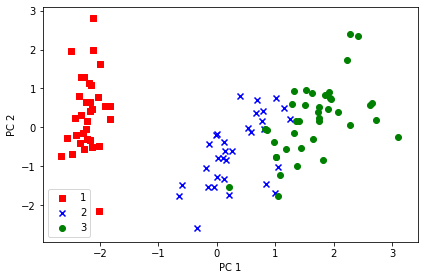

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca_scikit[Y_train == l, 0], 
                X_train_pca_scikit[Y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
#plt.savefig('pca-scikit.png', dpi=300)
plt.show()

In [16]:
## Implement PCA and use all components 
## giving the explained variance of each Principal Component
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=1, random_state=1) # we will see the parameter C below
lr.fit(X_train_pca_scikit, Y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


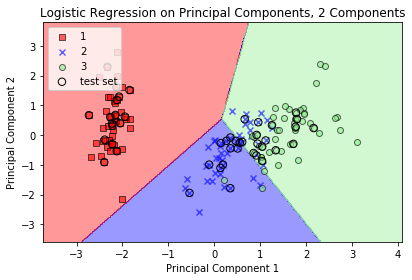

In [17]:
X_combined_std = np.vstack((X_train_pca_scikit, X_test_pca_scikit))
Y_combined = np.hstack((Y_train, Y_test))
Y_combined
plot_decision_regions(X_combined_std, Y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('Logistic Regression on Principal Components, 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('logistic_regression.png', dpi=300)
plt.show()

In [18]:
# Use the LR model to predict the test data
Y_pred = lr.predict(X_test_pca_scikit)
# Lets see how good we did
print('Misclassified samples: %d' %(Y_test != Y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test,Y_pred))

Misclassified samples: 6
Accuracy: 0.87


### Explain what you observed?
 

 Logistic Regression was implemented for classification of the species. <br> In the first case, Logistic Regression was implemented on 2 features, namely sepal length and petal length and the accuracy of 0.82 was observed.<br> In the second case, logistic regression was implemented on the same two features but they were standardized and scaled before. Similar accuracy was observerd. <br> In the third case, Logistic Regression was implemented on two Principal Components that explained the maximum amount of variance. The accuracy observed was imporoved to 0.87 (the same c value = 1 was used in all Logistic Regressions)

# Task 2 

In this exercise, we will take two features iris dataset and train using AdalineGD vs. AdalineSGD based on the implementation provided below and the perceptron model implementations from scikit-learn and one provided below.  
You should have three plot (Adaline Rule vs. AdalineSGD vs. scikit Perceptron) along with performance comparison between these four methods. What do you observe in terms of performance difference? Please explain your interpretation. 

However, you are free to use any combination of two features out of 4 features given in this dataset. 


## Importing the dataset again and extracting 2 features, petal lenth and sepal length.

In [19]:
iris = pd.read_csv("iris.csv")
X = iris.iloc[:, [1,3]].values
X
Y = iris.iloc[:, 5].values
Y
class_mapping = {label:idx+1 for idx,label in 
                 enumerate(np.unique(Y))}
iris['Species'] = iris['Species'].map(class_mapping)
Y = iris.iloc[:,5].values
Y

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

## Use StandardScalar to scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Adaline GD

In [20]:
# Sebastian Raschka's implementation of the Adaline Rule
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        (After training, we can look at this to see if our algorithm converged)
    """
    def __init__(self, eta=0.01, n_iter=50, debug=False):
        self.eta = eta
        self.n_iter = n_iter
        self.debug = debug

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if self.debug: print("New Weights:", self.w_)
            if self.debug: print("Cost:", cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

In [21]:
ada = AdalineGD(n_iter=30,eta=0.01)
ada.fit(X_train_std,Y_train)
# Step3: Use the model to predict the test data
y_pred = ada.predict(X_test_std)
# Lets see how good we did
print('Misclassified samples: %d' %(Y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test,y_pred))

Misclassified samples: 29
Accuracy: 0.36


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


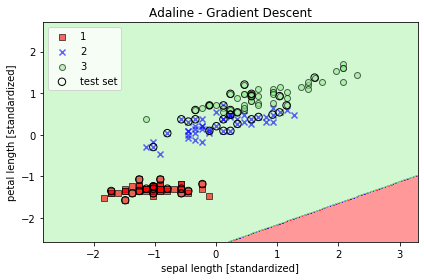

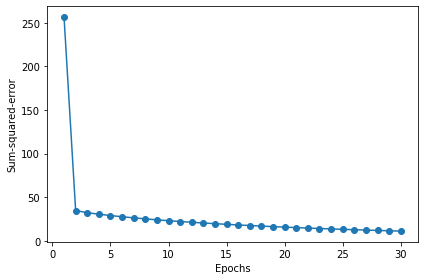

In [22]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=ada,test_idx=range(105, 150))
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./adalineGD.png', dpi=300)
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

## Adaline SGD

In [23]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Misclassified samples: 29
Accuracy: 0.36


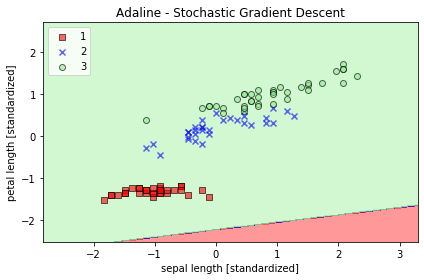

In [24]:
adasgd = AdalineSGD(n_iter=20, eta=0.01, random_state=0)
# We are using all but the first input sample to train (no split)
adasgd.fit(X_train_std[1:, :], Y_train[1:])

y_pred = adasgd.predict(X_test_std)
# Lets see how good we did
print('Misclassified samples: %d' %(Y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test,y_pred))

plot_decision_regions(X_train_std, Y_train, classifier=adasgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('adalineSGD.png', dpi=300)
plt.show()

## Raschka's implementation of Perceptron

In [25]:
# # Sebastian Raschka's implementation of the Perceptron Learning rule
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01,n_iter=10,debug=False,random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed
        self.debug = debug

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_seed) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for iter in range(self.n_iter):
            errors = 0
            if self.debug: print("Iteration:", iter)
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if self.debug: print(xi, target, self.predict(xi), update)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if self.debug: print("New Weights:", self.w_)
            self.errors_.append(errors) 
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

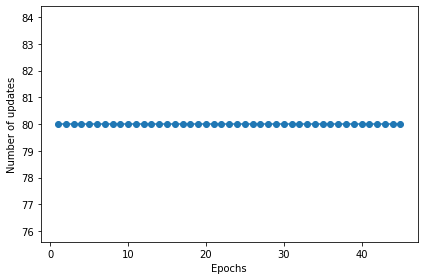

Misclassified samples: 33
Accuracy: 0.27


In [26]:
ppn = Perceptron(eta=0.1, n_iter=45)
# Note, we are not passing the initial weights, they are 
# randomly inside the model implementation
ppn.fit(X_train_std, Y_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
#plt.savefig('./perceptron_1.png', dpi=300)
plt.show()
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


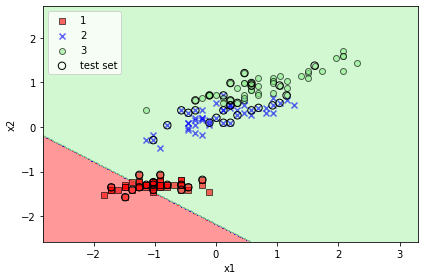

In [27]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=ppn,test_idx=range(105, 150))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

## Scikit Learn Perceptron 

In [28]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

x_ppn, y_ppn = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values 
X_train, X_test, y_train, y_test = \
    train_test_split(x_ppn, y_ppn, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn = Perceptron(max_iter=30, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy: 0.96


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


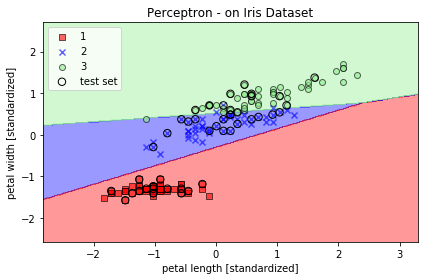

In [29]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.title('Perceptron - on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('iris_perceptron_scikit.png', dpi=300)
plt.show()

## Observation

I observed that Adaline-Gradient Descent and Adaline-Stochastic Gradient Descent have the same amount of misclassification samples and same accuracy (29 misclassified samples and accuracy of 0.36). Whereas, the accuracy falls in case of Raschka's perceptron model to 0.27 with 33 misclassified samples. <br> The scikit learn perceptron works the best and gives an accuracy of 0.96 with only 2 misclassified samples

## Task 3 Explore parameter tuning in Scikit Logistic regression

We have seen that the 'C' parameter in logistic regression determines the strength of logistic regression. In this exercise, you will tune the 'C' parameter to get best performance from the model for iris data classification. 
Write the code to run logistic regression on iris data and report the performance for 10 different values of 'C' (just Accuracy will do).

In [30]:
# Use the LR model to predict the test data
for c in range(1,32,3):
    x, y = iris.iloc[:, [1,2,3,4]].values, iris.iloc[:, 5].values 
    X_train, X_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.3, random_state=0)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    lr = LogisticRegression(C=c, random_state=0)
    lr.fit(X_train_std,y_train)
    Y_pred = lr.predict(X_test_std)
# Lets see how good we did
    print('Misclassified samples: %d' %(Y_test != Y_pred).sum())
    from sklearn.metrics import accuracy_score
    print('Accuracy: %.2f' % accuracy_score(Y_test,Y_pred))

Misclassified samples: 8
Accuracy: 0.82
Misclassified samples: 2
Accuracy: 0.96
Misclassified samples: 2
Accuracy: 0.96
Misclassified samples: 2
Accuracy: 0.96
Misclassified samples: 2
Accuracy: 0.96
Misclassified samples: 1
Accuracy: 0.98
Misclassified samples: 1
Accuracy: 0.98
Misclassified samples: 1
Accuracy: 0.98
Misclassified samples: 1
Accuracy: 0.98
Misclassified samples: 1
Accuracy: 0.98
Misclassified samples: 1
Accuracy: 0.98


## Task 4 Explore parameter tuning in SVM

Similar to the previous task, use the SVM model for various kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and report the performance (just Accuracy will do). 

In [31]:
from sklearn.svm import SVC
kernels = ["linear","poly","rbf","sigmoid"]
for k in kernels:
    x, y = iris.iloc[:, [1,2,3,4]].values, iris.iloc[:, 5].values 
    X_train, X_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.3, random_state=0)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    svm = SVC(kernel=k, C=10.0, random_state=0)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    print("\nKernel: {}".format(k))
    from sklearn.metrics import accuracy_score
    print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))


Kernel: linear
Accuracy: 0.98

Kernel: poly
Accuracy: 0.96

Kernel: rbf
Accuracy: 0.98

Kernel: sigmoid
Accuracy: 0.93
